1. Performing EDA on the given dataset "obesity levels in people from Mexico, Peru, and Colombia, ranging in age from 14 to 61, with varying eating habits and physical conditions".

We analyzed and investigated the dataset and summarized the main characteristics

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('//content/ObesityDataSet_raw_and_data_sinthetic.csv')

# Explore the data
# Check the first few rows of the dataset
print(data.head())

# Check the structure of dataset
print(data.info())

# Check summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

2.
To perform preprocessing and identify patterns within the data, we'll handle missing values, encode categorical variables, and look for correlations and distributions in the data.

Handling outliers:
Distribution of Categorical Variables:


<ipython-input-20-2531858c24e6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=col, palette="Set2")


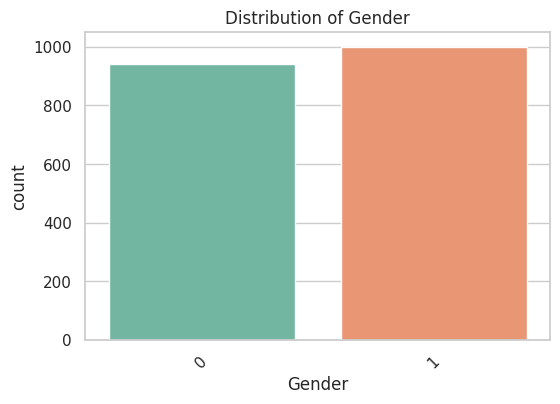

<ipython-input-20-2531858c24e6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=col, palette="Set2")


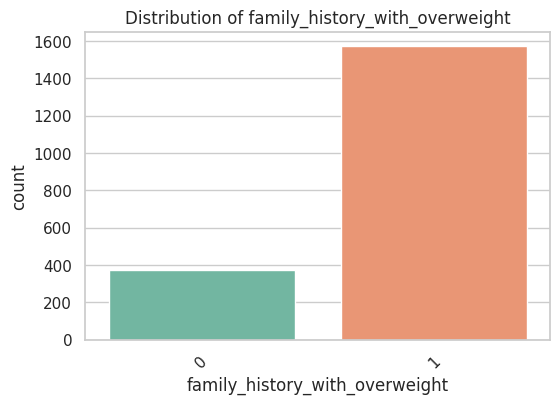

<ipython-input-20-2531858c24e6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=col, palette="Set2")


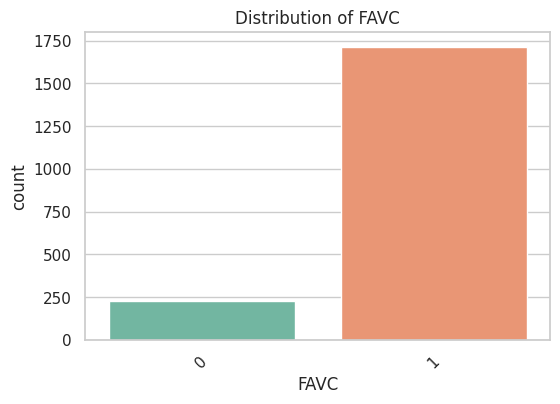

<ipython-input-20-2531858c24e6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=col, palette="Set2")


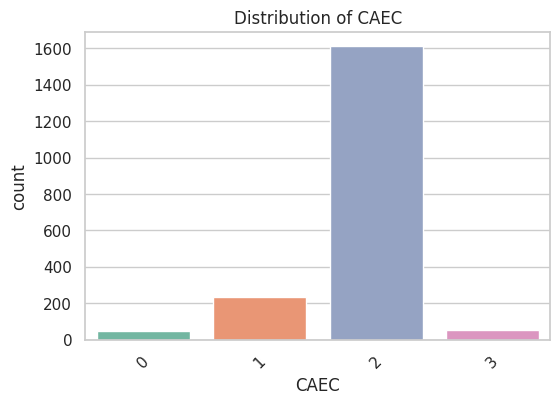

<ipython-input-20-2531858c24e6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=col, palette="Set2")


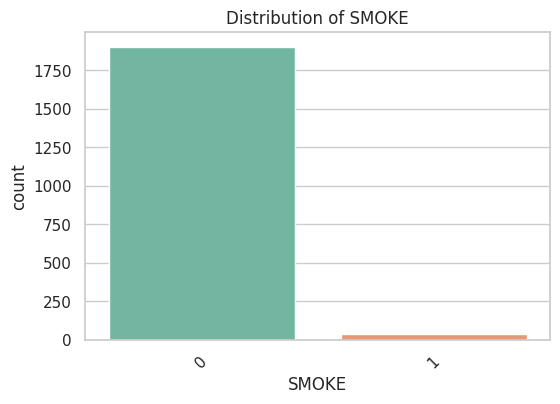

<ipython-input-20-2531858c24e6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=col, palette="Set2")


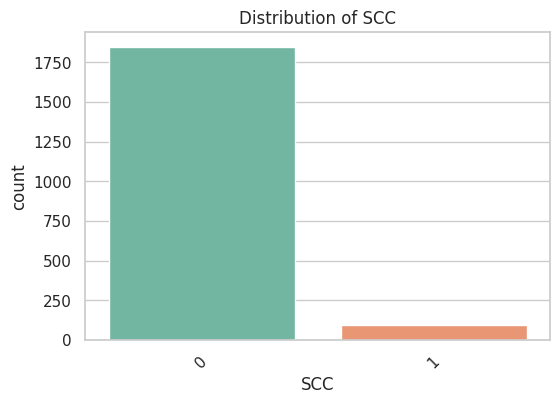

<ipython-input-20-2531858c24e6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=col, palette="Set2")


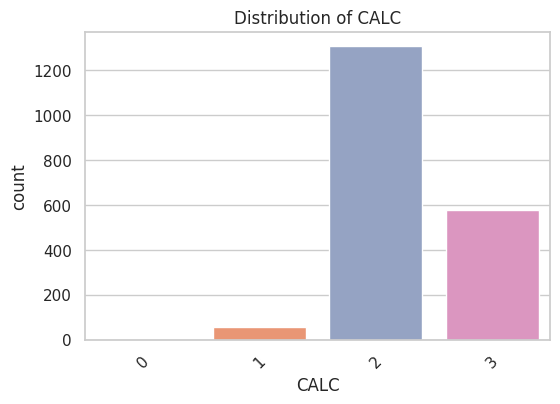

<ipython-input-20-2531858c24e6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=col, palette="Set2")


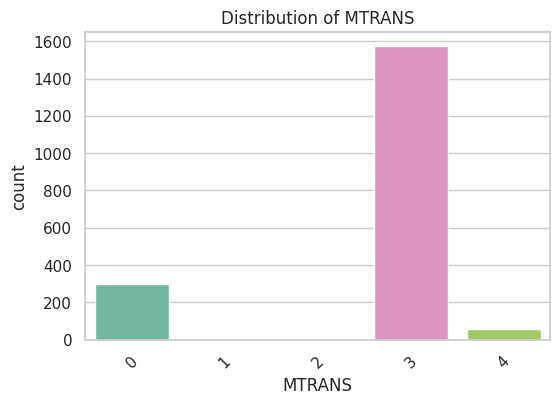

<ipython-input-20-2531858c24e6>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, x=col, palette="Set2")


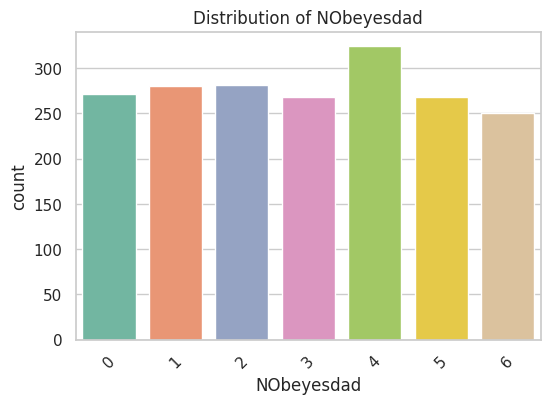

Distribution of Numerical Variables:


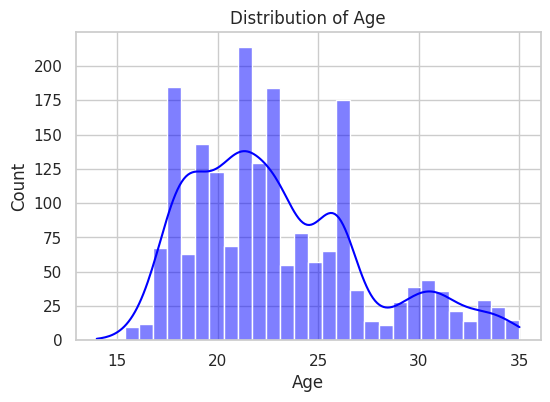

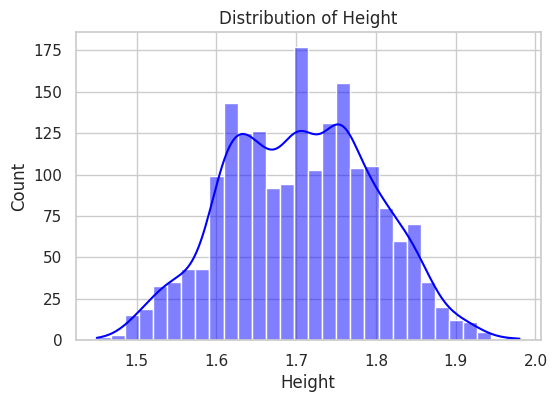

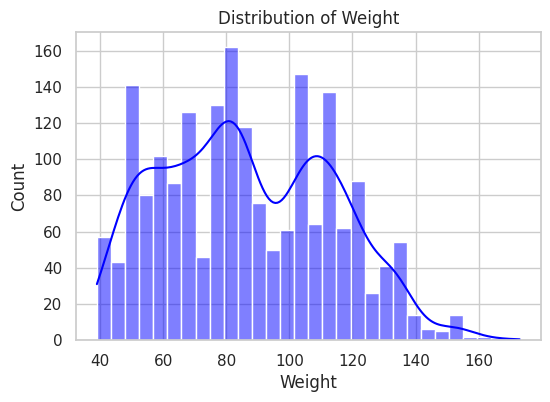

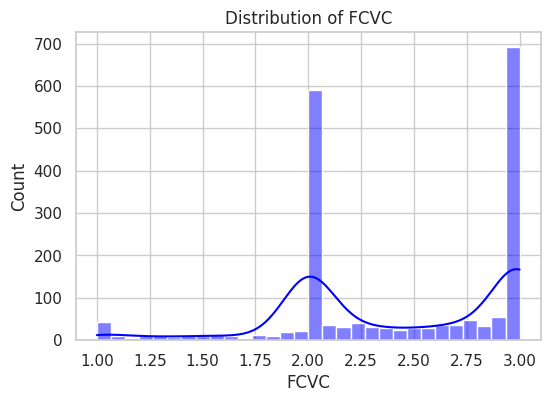

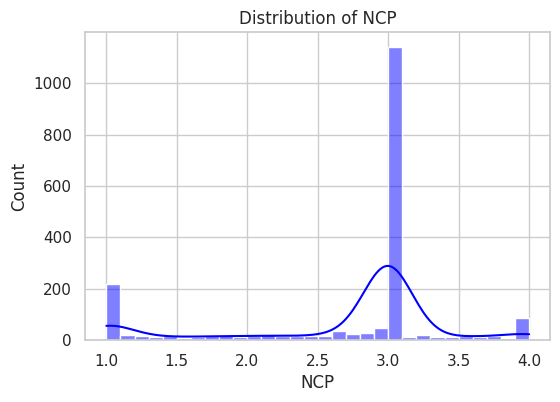

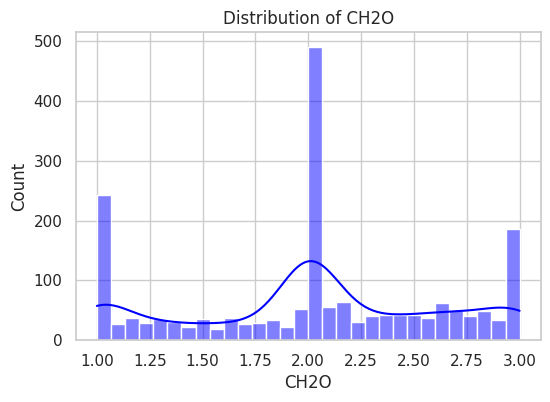

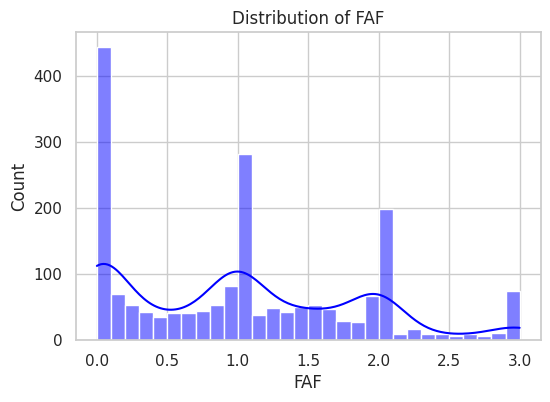

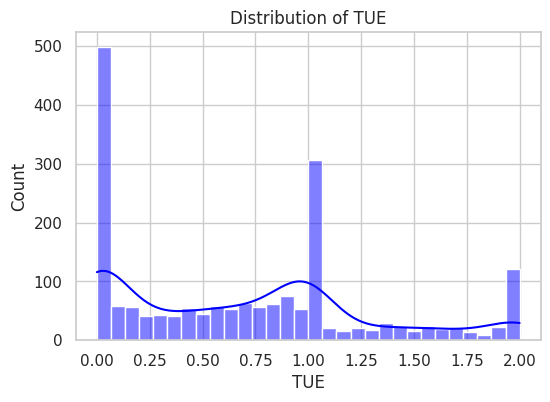

Box Plots for Numerical Variables:


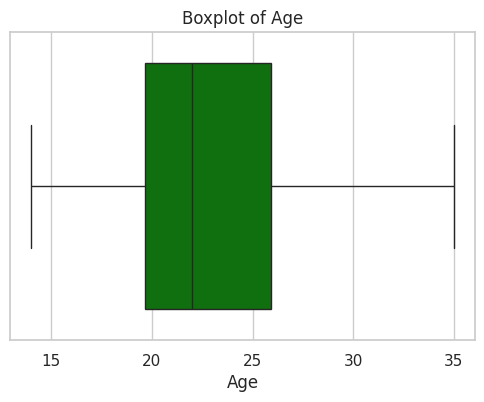

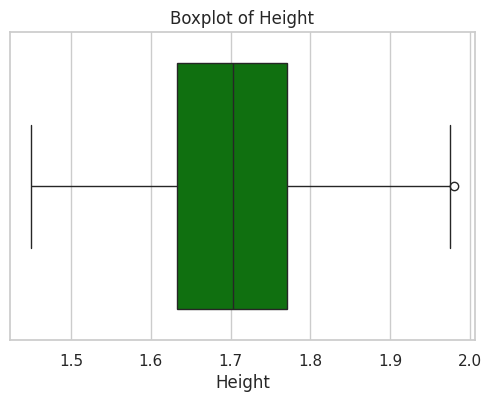

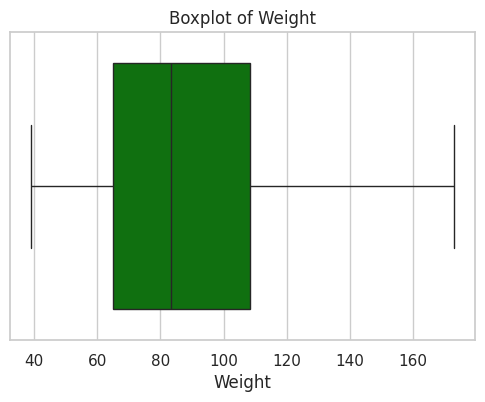

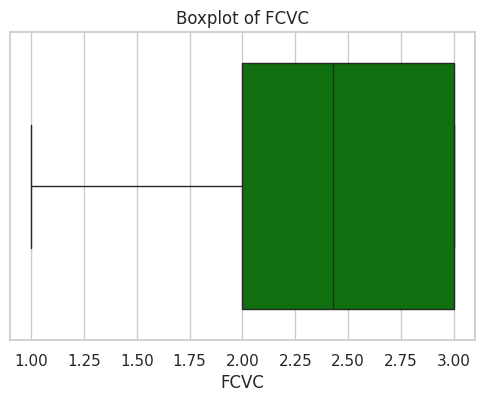

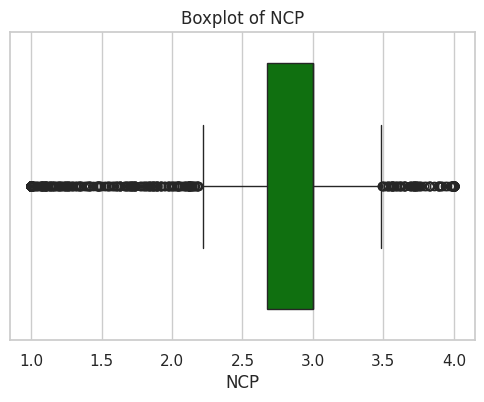

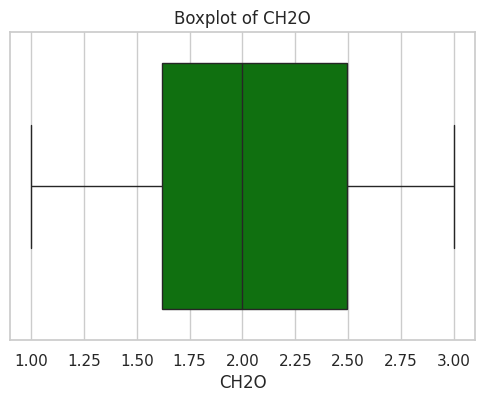

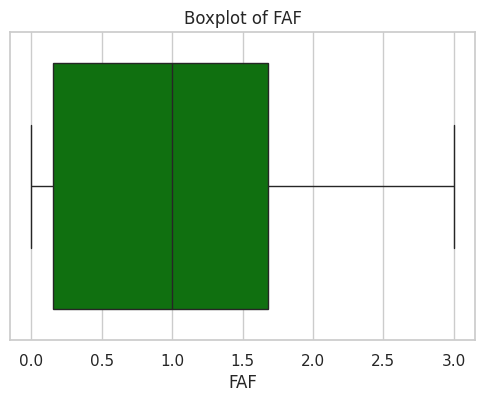

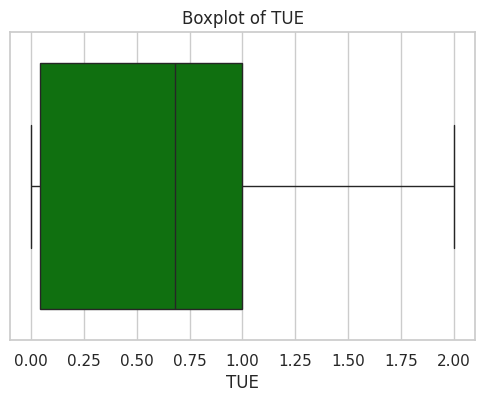

In [20]:
from sklearn.preprocessing import LabelEncoder

# Preprocessing

# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = label_encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = label_encoder.fit_transform(data['FAVC'])
data['CAEC'] = label_encoder.fit_transform(data['CAEC'])
data['MTRANS'] = label_encoder.fit_transform(data['MTRANS'])
data['SMOKE'] = label_encoder.fit_transform(data['SMOKE'])
data['SCC'] = label_encoder.fit_transform(data['SCC'])
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])
data['CALC'] = label_encoder.fit_transform(data['CALC'])

# Handling outliers using the IQR method for numerical columns
print("Handling outliers:")

def remove_outliers(df, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Apply to numerical columns where necessary (example: Age, Weight)
for col in ['Age', 'Weight']:
    data = remove_outliers(data, col)

#Univariate analysis
# Set the plot style for consistency
sns.set(style="whitegrid")

# List of categorical and numerical columns
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Plotting the distribution of categorical variables
print("Distribution of Categorical Variables:")
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data, x=col, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Plotting histograms for numerical variables
print("Distribution of Numerical Variables:")
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plotting box plots to check for outliers in numerical variables
print("Box Plots for Numerical Variables:")
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data, x=col, color='green')
    plt.title(f'Boxplot of {col}')
    plt.show()




3. Testing various machine learning models (from sklearn library) to determine the best fit for this dataset.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split the dataset into features (X) and the target variable (y)
X = data.drop(columns=['NObeyesdad'])
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose machine learning models to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Train each model on the training data and evaluate performance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.6735
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        61
           1       0.52      0.62      0.57        52
           2       0.55      0.49      0.52        57
           3       0.86      0.79      0.83        72
           4       0.82      1.00      0.90        59
           5       0.61      0.40      0.48        43
           6       0.40      0.42      0.41        45

    accuracy                           0.67       389
   macro avg       0.65      0.65      0.64       389
weighted avg       0.67      0.67      0.67       389


Model: Decision Tree
Accuracy: 0.9460
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        61
           1       0.92      0.90      0.91        52
           2       0.98      0.89      0.94        57
           3       0.94      0.94      0.94        72
   

Hence among the models used, we choose Random Forest as it depicted best performance metrices compared to others.

4.
Report:

 1. Introduction:
This report presents the findings of the exploratory data analysis (EDA) conducted on a dataset containing information about individuals' characteristics and habits, including gender, age, height, weight, family history with overweight, dietary habits, physical activity levels, and obesity levels. The dataset aims to investigate patterns and relationships among variables and to evaluate machine learning models for predicting obesity levels.

 2. Preprocessing Steps:
Before conducting the analysis, several preprocessing steps were taken:

There were no missing values in any category to be handled.
Categorical variables were encoded using label encoding.
Then we checked for the outliers using IQR method and removed them.

The dataset was split into features (X) and the target variable (y).
The data was split into training and testing sets.
3. EDA Findings:
Before Preprocessing:

The data appeared randomly distributed across various graphs, indicating no clear patterns initially.
Gender distribution showed a slightly higher proportion of males compared to females.
Family history with obesity indicated that most individuals had a family history of overweight.
A boxplot revealed differences in weight distributions between genders, with females having a broader spread of weights and higher extremums.
After Preprocessing:

The data became more readable and structured after preprocessing.
Each variable showed noticeable improvements, indicating better organization and consistency.
4. Model Evaluation:
Four machine learning models were tested on the dataset:

Logistic Regression,
Decision Tree,
Random Forest,
Support Vector Machine

Results from Test Data:
Among the tested models, Random Forest achieved the best performance:

Accuracy: 96.14%

5. Conclusion:
The EDA revealed important insights into the dataset, including the initial randomness of data distribution and the impact of preprocessing on data clarity. The evaluation of machine learning models identified Random Forest as the best-performing model for predicting obesity levels. Further analysis and fine-tuning of the selected model can be conducted to enhance its performance.